In [2]:
from math import *
import numpy as np
import pandas as pd
import random

In [25]:
df = pd.read_excel('https://github.com/junaart/ForStudents/blob/master/Big_Data/Seminar_3/demo26.xlsx?raw=true')
df.head()

,Год,1990,1995,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Все население,69.19,64.52,65.34,65.23,64.95,64.84,65.31,65.37,66.69,...,68.94,69.831495,70.24,70.76,70.93,71.39,71.87,72.70,72.91,73.34
1,Все мужчины,63.73,58.12,59.03,58.92,58.68,58.53,58.91,58.92,60.43,...,63.09,64.039883,64.56,65.13,65.29,65.92,66.50,67.51,67.75,68.24
2,Все женщины,74.30,71.59,72.26,72.17,71.90,71.85,72.36,72.47,73.34,...,74.88,75.605552,75.86,76.30,76.47,76.71,77.06,77.64,77.82,78.17
3,Все городское население,69.55,64.70,65.69,65.57,65.40,65.36,65.87,66.10,67.43,...,69.69,70.509150,70.83,71.33,71.44,71.91,72.35,73.16,73.34,73.72
4,Все городское население мужчины,64.31,58.30,59.35,59.23,59.09,59.01,59.42,59.58,61.12,...,63.82,64.668980,65.10,65.64,65.75,66.38,66.91,67.90,68.11,68.56


Транспозиция исходного фрейма и удаление строчки с наименованиями

In [26]:
df = df.transpose()
df = df.iloc[1:,0:5]
display(df.head(10))


,0,1,2,3,4
1990,69.19,63.73,74.3,69.55,64.31
1995,64.52,58.12,71.59,64.7,58.3
2000,65.34,59.03,72.26,65.69,59.35
2001,65.23,58.92,72.17,65.57,59.23
2002,64.95,58.68,71.9,65.4,59.09
2003,64.84,58.53,71.85,65.36,59.01
2004,65.31,58.91,72.36,65.87,59.42
2005,65.37,58.92,72.47,66.1,59.58
2006,66.69,60.43,73.34,67.43,61.12
2007,67.61,61.46,74.02,68.37,62.2


Добавление первого столбца с годами и изменение названий колонок

In [27]:
df.insert(0,'Год',df.index)
df.columns=['Год','FIRST','SECOND','THIRD','FOURTH','FIFTH']
df.index=np.arange(0,df.shape[0])
df.head()

,Год,FIRST,SECOND,THIRD,FOURTH,FIFTH
0,1990,69.19,63.73,74.3,69.55,64.31
1,1995,64.52,58.12,71.59,64.7,58.3
2,2000,65.34,59.03,72.26,65.69,59.35
3,2001,65.23,58.92,72.17,65.57,59.23
4,2002,64.95,58.68,71.9,65.4,59.09


Отобрать года, для которых значение во втором столбце больше среднего значения этого столбца.

In [5]:
print(df['SECOND'].mean())
display(df[df['SECOND']>df['SECOND'].mean()]['Год'])

62.70681285629318


0     1990
11    2009
12    2010
13    2011
14    2012
15    2013
16    2014
17    2015
18    2016
19    2017
20    2018
21    2019
Name: Год, dtype: object

Вывести на экран все строки фрейма за четные года.

In [6]:
df.head(4)

,Год,FIRST,SECOND,THIRD,FOURTH,FIFTH
0,1990,69.19,63.73,74.3,69.55,64.31
1,1995,64.52,58.12,71.59,64.7,58.3
2,2000,65.34,59.03,72.26,65.69,59.35
3,2001,65.23,58.92,72.17,65.57,59.23


Построить график по оси x - года, по оси y значения третьего столбца.

<AxesSubplot:xlabel='Год'>

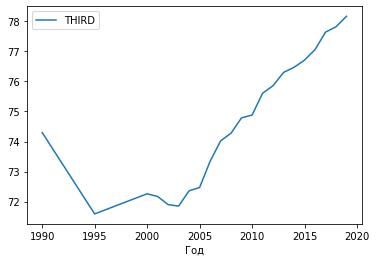

In [7]:
df[['Год','THIRD']].plot(x='Год',y='THIRD')

Добавить к фрейму новый столбец категориальных данных по принципу: если значение третьего столбца в строке больше медианного значения этого столбца и значение четвертого столбца этой строки больше медианного значения этого столбца, то в новый столбец пишем 'good', в противном случае пишем 'bad'.

In [8]:
df['NEW']=np.where((df['THIRD']>df['THIRD'].mean()) & (df['FOURTH']>df['FOURTH'].mean()),'good','bad')
display(df)

,Год,FIRST,SECOND,THIRD,FOURTH,FIFTH,NEW
0,1990,69.19,63.73,74.3,69.55,64.31,bad
1,1995,64.52,58.12,71.59,64.7,58.3,bad
2,2000,65.34,59.03,72.26,65.69,59.35,bad
3,2001,65.23,58.92,72.17,65.57,59.23,bad
4,2002,64.95,58.68,71.9,65.4,59.09,bad
5,2003,64.84,58.53,71.85,65.36,59.01,bad
6,2004,65.31,58.91,72.36,65.87,59.42,bad
7,2005,65.37,58.92,72.47,66.1,59.58,bad
8,2006,66.69,60.43,73.34,67.43,61.12,bad
9,2007,67.61,61.46,74.02,68.37,62.2,bad


Сохранить полученный фрейм с именем 'Test.csv', загрузить его на github, преподавателю прислать ссылку.

In [10]:
df.to_csv('Test.csv')

https://github.com/VY354/TaskProjects/blob/9a969bf06a0d599327e3339d290612c4b2e32f76/Test.csv